<a href="https://colab.research.google.com/github/Aayushmatkar/DataScienceApplications/blob/main/AVM_Clustering_TRIAL_1.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import nltk
from nltk.corpus import gutenberg
import re
import os,random
import pandas as pd
nltk.download('punkt')
nltk.download('gutenberg')

def create_partitions(text, book_name, author):
    partitions = []
    words = nltk.word_tokenize(text)
    for i in range(0, len(words), 150):
        partitions.append((words[i:i+150], book_name, author))
    return partitions

#The books selected below are from the gutenberg module and are of the same genre 'novel'
book_names=['melville-moby_dick.txt','edgeworth-parents.txt','chesterton-thursday.txt','austen-emma.txt','shakespeare-hamlet.txt']

def random_sentences_with_book_name():
  result=pd.DataFrame(columns=['Text', 'Book Name','Author'])
  for i in book_names:
    # Splitting the book names to remove their 'txt' extension
    label_name=i.split('.')[0]

    # Getting the book names from Gutenberg and reading them
    book = gutenberg.raw(i)

    #Getting the book names and their respective authors
    lines = book.splitlines()

    #The first line consists information about the above comment
    line1=lines[0]
    
    #Removing the year from the line
    pattern = r'\D+'

    digits_removed = re.findall(pattern, line1)

    #Getting the author name
    author = re.search(r'\sby\s([\w\s\.]+)[\s\d{4}]+', digits_removed[0]).group(1)

    #Getting the book name
    book_name = re.search(r'\[([\w\s\']+)[\,]?\sby', line1).group(1)

    # Create partitions of 150 words each
    partitions = create_partitions(book, book_name, author)

    # Create 200 random samples of the partitions
    samples = random.sample(partitions, 200)

    # Using regular expressions to clean the data
    for i in range(len(samples)):
        samples[i] = (re.sub(r'[^\w\s]','', ' '.join(samples[i][0])), samples[i][1], samples[i][2])

    # Serialize the data using Pandas
    df = pd.DataFrame(samples, columns=['Text', 'Book Name','Author'])

    #Appending the random sentences of a book to the final dataframe 
    result=pd.concat([result,df])
  result.to_csv('book_partitions.csv', index=False)

  print("Data saved to book_partitions.csv.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [81]:
random_sentences_with_book_name()

Data saved to book_partitions.csv.


In [82]:
data=pd.read_csv('book_partitions.csv')

In [83]:
data['label']=0
data['label'][200:400]=1
data['label'][400:600]=2
data['label'][600:800]=3
data['label'][800:1000]=4

<ipython-input-83-f510ee5b3d00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'][200:400]=1
<ipython-input-83-f510ee5b3d00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'][400:600]=2
<ipython-input-83-f510ee5b3d00>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'][600:800]=3
<ipython-input-83-f510ee5b3d00>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [84]:
data

,Text,Book Name,Author,label
0,spangling sun shifted and glistened like a li...,Moby Dick,Herman Melville,0
1,of the Hindoos gives us this divine Vishnoo h...,Moby Dick,Herman Melville,0
2,started to run Pip was left behind on the sea...,Moby Dick,Herman Melville,0
3,to be seen in all animated nature Out of the ...,Moby Dick,Herman Melville,0
4,and not all the King his fathers influence cou...,Moby Dick,Herman Melville,0
...,...,...,...,...
995,enough to color I know the good King Queene ...,The Tragedie of Hamlet,William Shakespeare,4
996,There was he gaming there oretooke in s Rous...,The Tragedie of Hamlet,William Shakespeare,4
997,not his owne For hee himselfe is subiect to h...,The Tragedie of Hamlet,William Shakespeare,4
998,He tooke me by the wrist and held me hard Th...,The Tragedie of Hamlet,William Shakespeare,4


#BAG OF WORDS

#K-MEANS with BAG OF WORDS 


In [85]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['label'], test_size=0.2, random_state=42)

In [86]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.fit_transform(X_test)
new_X_train=X_train_vectorized.toarray()
new_X_test = X_test_vectorized.toarray()

###USED FOR DIMENSION REDUCTION 

In [87]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

Clustered data points for X_train

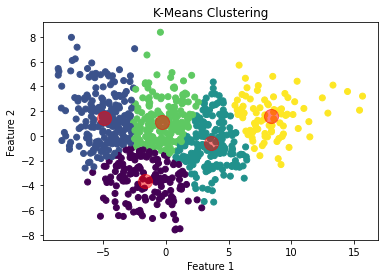

In [88]:
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_pca_train)

# Get the predicted cluster labels
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
# Plot the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

Unclustered Raw datapoints of data

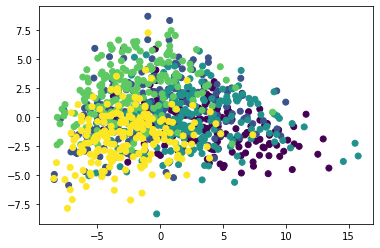

In [89]:
 data_vectorized=vectorizer.fit_transform(data['Text'])
 new_data_vectorized=data_vectorized.toarray()
 pca = PCA(n_components=2)
 X_pca_data=pca.fit_transform(new_data_vectorized)
 plt.scatter(X_pca_data[:, 0], X_pca_data[:, 1], c=data['label'])

Clustered data points for X_test

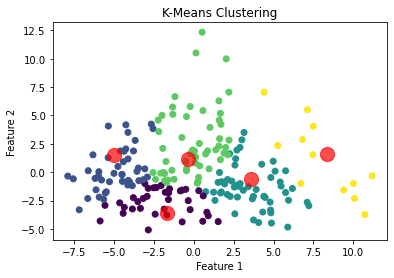

In [90]:
predicted_labels=kmeans.predict(X_pca_test)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

In [91]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics.cluster import adjusted_rand_score

silhouette = silhouette_score(X_pca_train, labels)
print ("the Silhoutte score is :" ,silhouette)
print("===============================================================================================")


kappa = cohen_kappa_score(y_test, predicted_labels)
print ("the Kappa score is :" ,kappa)
print("===============================================================================================")


ari = adjusted_rand_score(y_test, predicted_labels)
print ("the Coherence score is :" , ari)
print("===============================================================================================")

the Silhoutte score is : 0.35026539890714375
the Kappa score is : 0.009993462220977078
the Coherence score is : 0.08117232654161383


# EM (GAUSSIAN MIXTURE)with BAG OF WORDS

In [92]:
from sklearn.mixture import GaussianMixture
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['label'], test_size=0.2, random_state=42)

In [93]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

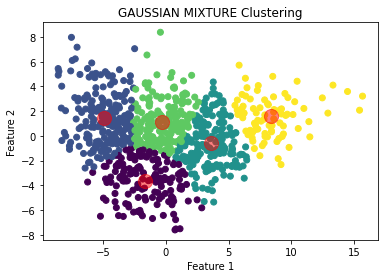

In [94]:
import matplotlib.pyplot as plt
n_clusters = 5 # number of clusters to find
em = GaussianMixture(n_components=n_clusters).fit(X_pca_train)


# Get the predicted cluster labels
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
# Plot the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('GAUSSIAN MIXTURE Clustering')
plt.show()

In [95]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics.cluster import adjusted_rand_score

silhouette = silhouette_score(X_pca_train, labels)
print ("the Silhoutte score is :" ,silhouette)
print("===============================================================================================")


kappa = cohen_kappa_score(y_test, predicted_labels)
print ("the Kappa score is :" ,kappa)
print("===============================================================================================")


ari = adjusted_rand_score(y_test, predicted_labels)
print ("the Coherence score is :" , ari)
print("===============================================================================================")

the Silhoutte score is : 0.3502665991234498
the Kappa score is : 0.009993462220977078
the Coherence score is : 0.08117232654161383


#HEIRARCHIAL with BAG OF WORDS 


In [106]:
from sklearn.mixture import GaussianMixture
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['label'], test_size=0.2, random_state=42)

In [107]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

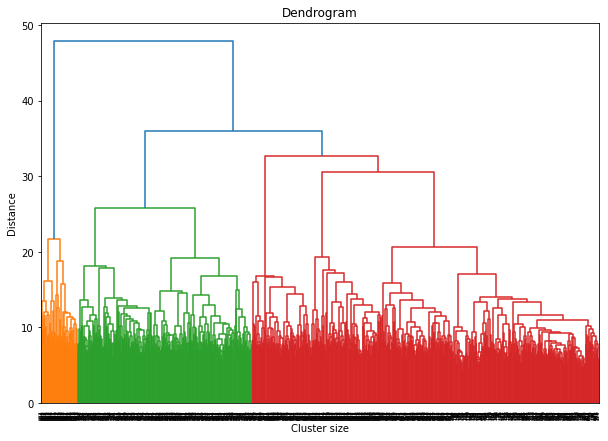

[2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 4 2 2 2 0 2 2 2 2 2 2 2 0 2 2 0 2
 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2
 2 2 0 0 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 0 0 2 2 2 2 0 2 2 2 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 4 0 2 0 0 0 0 2 0 0 0 0 2 0 3 0 0 2 0 0 0 0 0 2 2
 2 0 2 2 2 0 2 2 2 2 0 2 3 2 0 0 2 0 2 2 0 0 0 0 0 2 2 2 2 0 2 2 0 0 2 0 0
 2 2 2 2 0 0 2 3 3 2 2 0 2 0 2 2 2 0 2 0 2 0 0 0 3 2 2 2 3 0 0 0 2 0 2 0 2
 3 3 0 0 0 2 2 2 0 0 0 0 0 3 2 0 0 0 0 3 0 2 2 0 0 0 0 2 0 2 0 0 0 2 2 3 3
 3 2 2 0 0 2 2 0 0 2 3 0 0 0 2 0 2 0 2 0 2 0 3 3 0 0 0 2 0 0 0 0 0 0 2 2 0
 0 0 0 2 0 0 2 0 0 0 2 0 0 0 0 2 2 2 2 2 0 2 2 2 0 0 0 0 0 2 2 0 0 0 0 2 0
 2 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 2 0 0 2 0 0 2 0 

In [108]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("book_partitions.csv")

# Create bag of words model
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['Text'])

# Hierarchical clustering
linkage_matrix = linkage(X.toarray(), 'ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, orientation='top')
plt.xlabel("Cluster size")
plt.ylabel("Distance")
plt.title("Dendrogram")
plt.show()

# Agglomerative clustering with 5 clusters
n_clusters = 5
model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
model.fit(X.toarray())

# Print cluster labels
labels = model.labels_
print(labels)
print("==============================================================================================")

In [97]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics.cluster import adjusted_rand_score

silhouette = silhouette_score(X_pca_train, labels)
print ("the Silhoutte score is :" ,silhouette)
print("===============================================================================================")


kappa = cohen_kappa_score(y_test, predicted_labels)
print ("the Kappa score is :" ,kappa)
print("===============================================================================================")


ari = adjusted_rand_score(y_test, predicted_labels)
print ("the Coherence score is :" , ari)
print("===============================================================================================")

ValueError: ignored

#TFIDF 

Coherence K-means: 0.8782760736042435
Coherence GMM: 0.7392685847725017
Coherence Hierarchical: 0.8529288648363464
______________________________________________________________________________________
Kappa K-means: -0.028750000000000053
Kappa GMM: 0.030000000000000027
Kappa Hierarchical: -0.004999999999999893
______________________________________________________________________________________
Silhouette K-means: 0.8782760736042435
Silhouette GMM: 0.7392685847725017
Silhouette Hierarchical: 0.8529288648363464
______________________________________________________________________________________


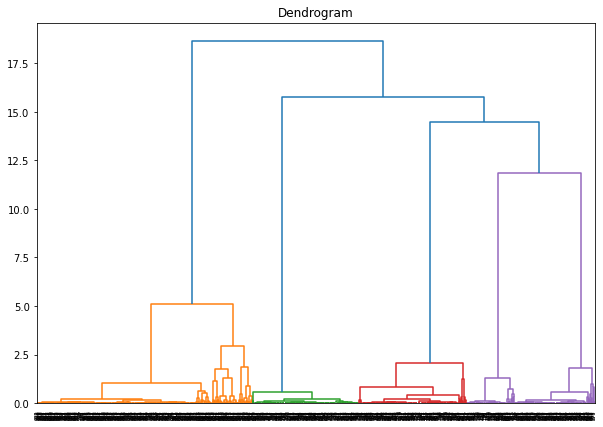

In [152]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score, cohen_kappa_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
df = pd.read_csv('book_partitions.csv')

# Convert the text to TF-IDF vectors
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_vectors = tfidf.fit_transform(df['Text'])

# Perform LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda_output = lda.fit_transform(tfidf_vectors)

# Run K-means clustering algorithm
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(lda_output)

# Run Gaussian Mixture Model clustering algorithm
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(lda_output)

# Run Hierarchical clustering algorithm
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg.fit(lda_output)

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = dendrogram(linkage(lda_output, method='ward'))

# Calculate coherence
coherence_kmeans = silhouette_score(lda_output, kmeans.labels_)
coherence_gmm = silhouette_score(lda_output, gmm.predict(lda_output))
coherence_agg = silhouette_score(lda_output, agg.labels_)

# Calculate kappa
true_labels = df['Author'].astype('category').cat.codes
kappa_kmeans = cohen_kappa_score(true_labels, kmeans.labels_)
kappa_gmm = cohen_kappa_score(true_labels, gmm.predict(lda_output))
kappa_agg = cohen_kappa_score(true_labels, agg.labels_)

# Calculate silhouette
silhouette_kmeans = silhouette_score(lda_output, kmeans.labels_)
silhouette_gmm = silhouette_score(lda_output, gmm.predict(lda_output))
silhouette_agg = silhouette_score(lda_output, agg.labels_)

# Print the results
print("Coherence K-means:", coherence_kmeans)
print("Coherence GMM:", coherence_gmm)
print("Coherence Hierarchical:", coherence_agg)
print("______________________________________________________________________________________")
print("Kappa K-means:", kappa_kmeans)
print("Kappa GMM:", kappa_gmm)
print("Kappa Hierarchical:", kappa_agg)
print("______________________________________________________________________________________")
print("Silhouette K-means:", silhouette_kmeans)
print("Silhouette GMM:", silhouette_gmm)
print("Silhouette Hierarchical:", silhouette_agg)
print("______________________________________________________________________________________")




#K-MEANS WITH TF-IDF

In [98]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['label'], test_size=0.2, random_state=42)

In [99]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.fit_transform(X_test)
new_X_train=X_train_vectorized.toarray()
new_X_test = X_test_vectorized.toarray()

In [100]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

#
CLUSTERED DATA POINTS 

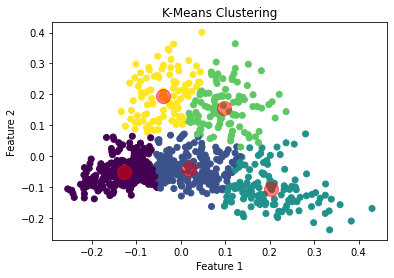

In [101]:
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_pca_train)

# Get the predicted cluster labels
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
# Plot the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

#NON CLUSTERED DATA POINTS 

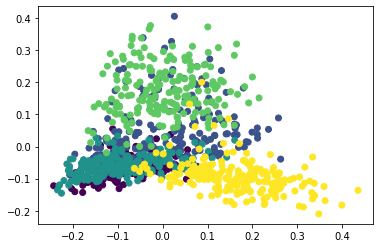

In [102]:
 data_vectorized=vectorizer.fit_transform(data['Text'])
 new_data_vectorized=data_vectorized.toarray()
 pca = PCA(n_components=2)
 X_pca_data=pca.fit_transform(new_data_vectorized)
 plt.scatter(X_pca_data[:, 0], X_pca_data[:, 1], c=data['label'])

#clusterd data points for x_test 

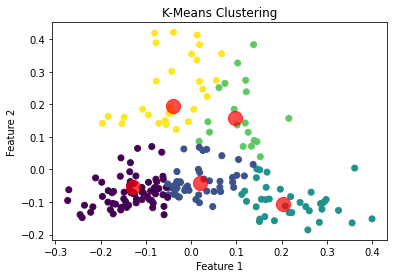

In [103]:
predicted_labels=kmeans.predict(X_pca_test)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

In [104]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics.cluster import adjusted_rand_score

silhouette = silhouette_score(X_pca_train, labels)
print ("the Silhoutte score is :" ,silhouette)
print("===============================================================================================")


kappa = cohen_kappa_score(y_test, predicted_labels)
print ("the Kappa score is :" ,kappa)
print("===============================================================================================")


ari = adjusted_rand_score(y_test, predicted_labels)
print ("the Coherence score is :" , ari)
print("===============================================================================================")


the Silhoutte score is : 0.4109971626237221
the Kappa score is : 0.023388902712117354
the Coherence score is : 0.2915190058360803


#WORD2VEC

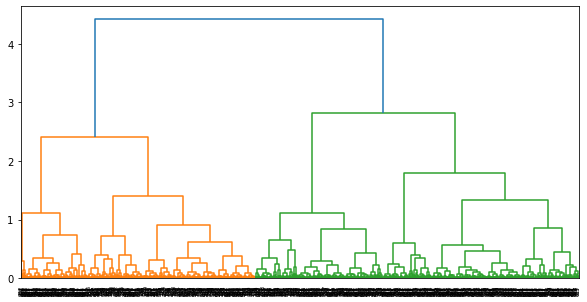

In [151]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("book_partitions.csv")



# Train word2vec model
sentences = [doc.split() for doc in data["Text"]]
model = Word2Vec(sentences, size=100, window=5, min_count=5, workers=4)

# Get document vectors
doc_vectors = []
for doc in sentences:
    vecs = [model.wv[word] for word in doc if word in model.wv]
    if vecs:
        doc_vectors.append(np.mean(vecs, axis=0))
    else:
        doc_vectors.append(np.zeros((100,)))

# Cluster with k-means
kmeans = KMeans(n_clusters=5, random_state=0).fit(doc_vectors)
kmeans_labels = kmeans.labels_

# Cluster with Gaussian mixture
gmm = GaussianMixture(n_components=5, random_state=0).fit(doc_vectors)
gmm_labels = gmm.predict(doc_vectors)

# Cluster with hierarchical clustering
Z = linkage(doc_vectors, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

#LDA

Coherence K-means: 0.5699226037441698
Coherence GMM: 0.1554598276956059
Coherence Hierarchical: 0.4800039676889422
______________________________________________________________________________________
Kappa K-means: 0.24
Kappa GMM: 0.040000000000000036
Kappa Hierarchical: 0.3125
______________________________________________________________________________________
Silhouette K-means: 0.5699226037441698
Silhouette GMM: 0.1554598276956059
Silhouette Hierarchical: 0.4800039676889422
______________________________________________________________________________________


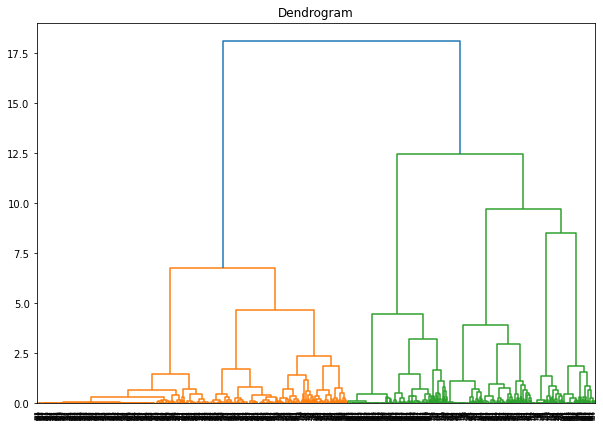

In [132]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score, cohen_kappa_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
df = pd.read_csv('book_partitions.csv')

# Convert the text to bag of words
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
bow = vectorizer.fit_transform(df['Text'])

# Perform LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit_transform(bow)

# Transform to topics
topics = lda.transform(bow)

# Run K-means clustering algorithm
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(topics)

# Run Gaussian Mixture Model clustering algorithm
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(topics)

# Run Hierarchical clustering algorithm
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg.fit(topics)

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(lda_output, method='ward'))

# Calculate coherence
coherence_kmeans = silhouette_score(topics, kmeans.labels_)
coherence_gmm = silhouette_score(topics, gmm.predict(topics))
coherence_agg = silhouette_score(topics, agg.labels_)

# Calculate kappa
true_labels = df['Author'].astype('category').cat.codes
kappa_kmeans = cohen_kappa_score(true_labels, kmeans.labels_)
kappa_gmm = cohen_kappa_score(true_labels, gmm.predict(topics))
kappa_agg = cohen_kappa_score(true_labels, agg.labels_)

# Calculate silhouette
silhouette_kmeans = silhouette_score(topics, kmeans.labels_)
silhouette_gmm = silhouette_score(topics, gmm.predict(topics))
silhouette_agg = silhouette_score(topics, agg.labels_)

# Print the results
print("Coherence K-means:", coherence_kmeans)
print("Coherence GMM:", coherence_gmm)
print("Coherence Hierarchical:", coherence_agg)
print("______________________________________________________________________________________")
print("Kappa K-means:", kappa_kmeans)
print("Kappa GMM:", kappa_gmm)
print("Kappa Hierarchical:", kappa_agg)
print("______________________________________________________________________________________")
print("Silhouette K-means:", silhouette_kmeans)
print("Silhouette GMM:", silhouette_gmm)
print("Silhouette Hierarchical:", silhouette_agg)
print("______________________________________________________________________________________")
